<a href="https://colab.research.google.com/github/sksuman97/TEDed-Talks-views-prediction/blob/main/Capstone_Project_3_Sumanta_Muduli_Ted_Talk_View_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Liabraries

In [ ]:
# Importing numpy and pandas
import pandas as pd
import numpy as np

# Importinng matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing train_test_split and grid search cv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Importing Various regressor algorithms from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# Importing XGBRegessor from xgboost liabrary
from xgboost import XGBRegressor

# Importing evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# Importing warnings liabrary to remove warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Capstone Projects/Ted Talk Views Prediction/Data/data_ted_talks.csv")

# Exploratory Data Analysis

Checking for duplicate rows in dataset

In [ ]:
df.duplicated(['talk_id']).sum()

0

No duplicates found

Removing 'talk_id' column from df as it's of no use

In [ ]:
del df['talk_id']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4001 non-null   object 
 3   occupations     3483 non-null   object 
 4   about_speakers  3502 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4004 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        3350 non-null   float64
 12  duration        4005 non-null   int64  
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

Most of the columns are of object type

In [ ]:
df.describe()

,views,comments,duration
count,4.005000e+03,3350.000000,4005.000000
mean,2.148006e+06,161.997015,724.011236
std,3.451226e+06,268.838922,361.775462
min,0.000000e+00,0.000000,60.000000
25%,8.820690e+05,38.000000,393.000000
50%,1.375508e+06,89.000000,738.000000
75%,2.133110e+06,188.000000,974.000000
max,6.505195e+07,6449.000000,3922.000000


## Cleaning Data
* Handling null values in columns

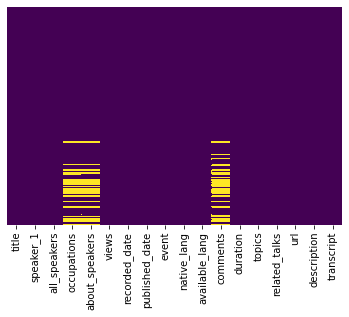

In [ ]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (20, 5)

In [ ]:
# Checking nan values in every column
def nan_check(data):
  '''creating a function that will show percentage of null values in each column'''
  total = data.isnull().sum().sort_values(ascending=False)
  percent_1 = data.isnull().sum()/data.isnull().count()*100
  percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
  missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
  return missing_data

nan_check(df)

,Total,%
comments,655,16.4
occupations,522,13.0
about_speakers,503,12.6
all_speakers,4,0.1
recorded_date,1,0.0
transcript,0,0.0
published_date,0,0.0
speaker_1,0,0.0
views,0,0.0
event,0,0.0


Dataset have very little nan values, we can drop them directly

In [ ]:
# Dropping nan values from columns
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 4002
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3338 non-null   object 
 1   speaker_1       3338 non-null   object 
 2   all_speakers    3338 non-null   object 
 3   occupations     3338 non-null   object 
 4   about_speakers  3338 non-null   object 
 5   views           3338 non-null   int64  
 6   recorded_date   3338 non-null   object 
 7   published_date  3338 non-null   object 
 8   event           3338 non-null   object 
 9   native_lang     3338 non-null   object 
 10  available_lang  3338 non-null   object 
 11  comments        3338 non-null   float64
 12  duration        3338 non-null   int64  
 13  topics          3338 non-null   object 
 14  related_talks   3338 non-null   object 
 15  url             3338 non-null   object 
 16  description     3338 non-null   object 
 17  transcript      3338 non-null   o

In [ ]:
df.describe()

,views,comments,duration
count,3.338000e+03,3338.000000,3338.000000
mean,2.187772e+06,162.224386,796.964949
std,3.531615e+06,269.253699,339.247811
min,1.065450e+05,0.000000,135.000000
25%,9.620490e+05,38.000000,577.000000
50%,1.417774e+06,89.000000,801.000000
75%,2.115465e+06,188.750000,1008.750000
max,6.505195e+07,6449.000000,3922.000000


## Numerical Features

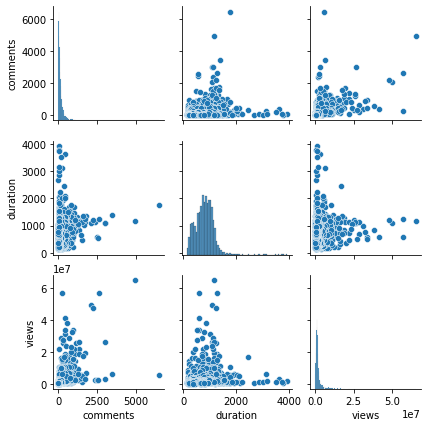

In [ ]:
sns.pairplot(df[['comments', 'duration','views']],  size=2)
plt.show()

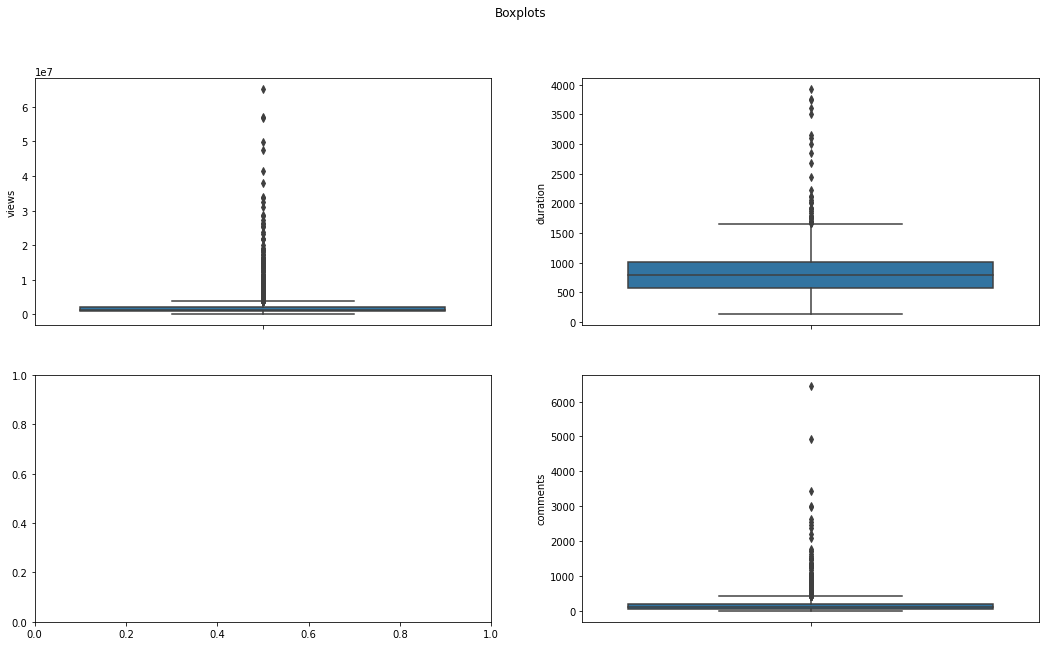

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(18, 10))

fig.suptitle('Boxplots')

sns.boxplot(ax=axes[0, 0], data=df, y='views')
sns.boxplot(ax=axes[0, 1], data=df,  y='duration')
sns.boxplot(ax=axes[1,1], data=df, y='comments')

Many outliers are there

## Distibution of variables

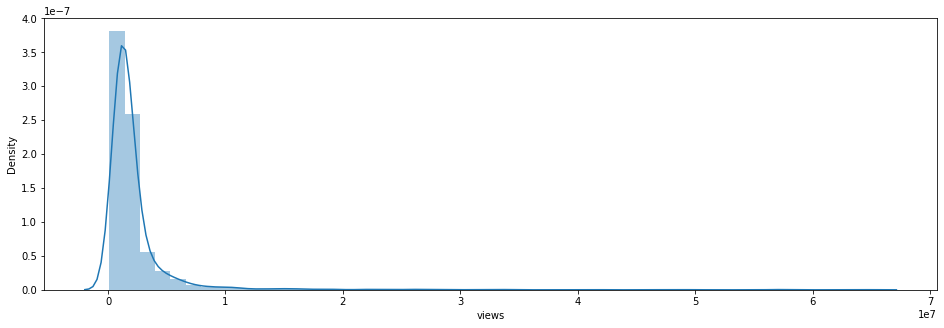

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df['views'], ax=ax)

Right Skewed 

### Apply log transformation on target variable to bring it into normal distribution shape

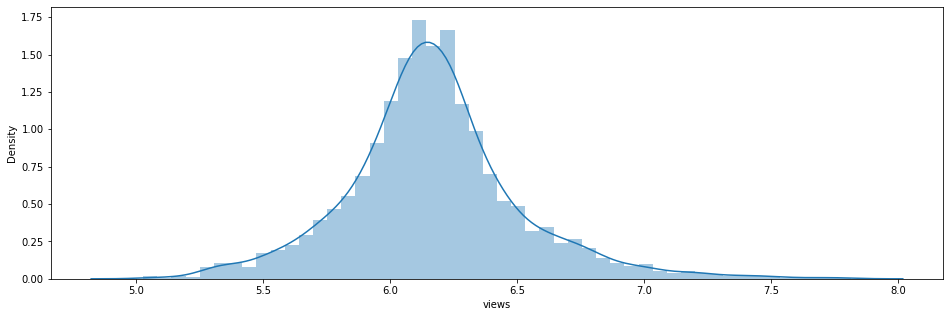

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(np.log10(df['views']), ax=ax)

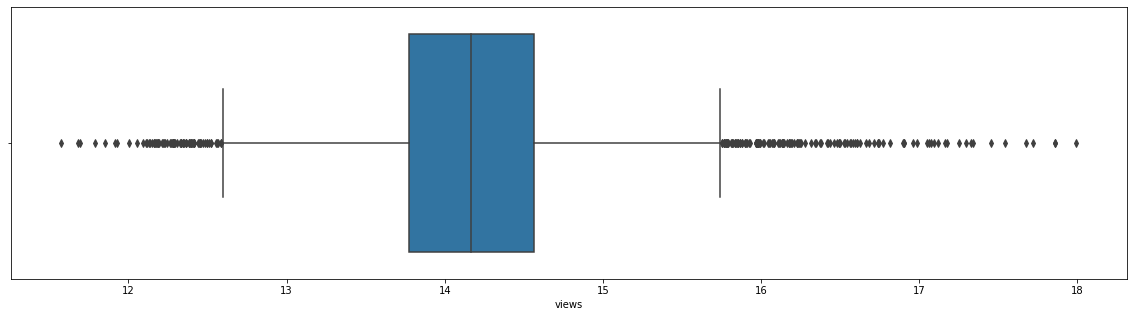

In [ ]:
sns.boxplot(np.log(df['views']))

Target variable is now in perfect normal shape

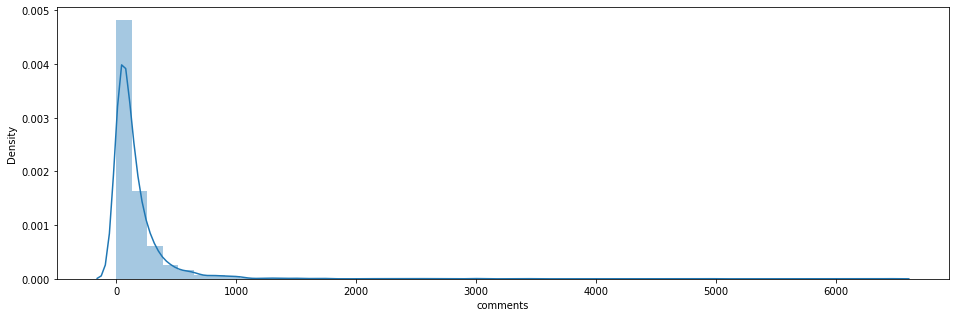

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df['comments'],ax=ax)

Right skewed

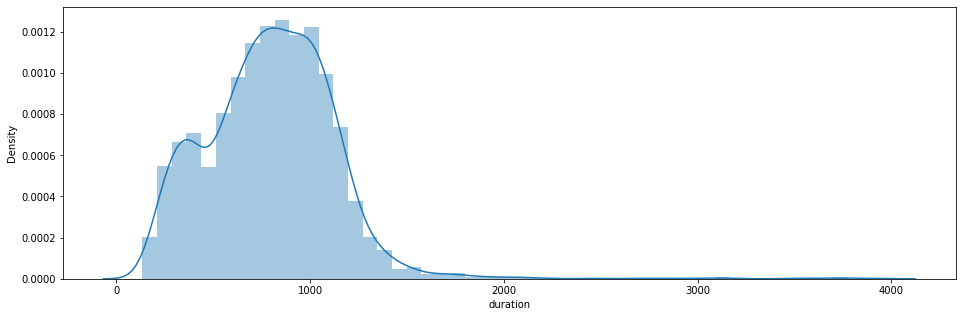

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df['duration'],ax=ax)

## Counting number of outliers in a column

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers      0
all_speakers        0
available_lang      0
comments          261
description         0
duration           35
event               0
native_lang         0
occupations         0
published_date      0
recorded_date       0
related_talks       0
speaker_1           0
title               0
topics              0
transcript          0
url                 0
views             340
dtype: int64

1. Number of languages
2. Inducing bias on the basis of broad spoken of language
3. Time taken to publish the video.
4. Number of speakers
5. Number of Occupations
6. How many talks that speaker has given prior to this
7. cluster label

In [ ]:
df.head()

## challenge-1
###How to induce impact of speaker columns on prediction

In [ ]:
df['speaker_1'].value_counts()

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Alex Rosenthal      10
                    ..
Trevor Timm          1
Sophia Wallace       1
Kevin Slavin         1
John Koenig          1
 Teitur              1
Name: speaker_1, Length: 3274, dtype: int64

In [ ]:
df['occupations'][4]

"{0: ['author', 'educator']}"

In [ ]:
df['about_speakers'][4]

'{0: "Creativity expert Sir Ken Robinson challenges the way we\'re educating our children. He champions a radical rethink of our school systems, to cultivate creativity and acknowledge multiple types of intelligence. "}'

In [ ]:
df['all_speakers'][10]

"{0: 'Larry Brilliant'}"

In [ ]:
df['topics'][4]

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

In [ ]:
df['related_talks'][4]

'{865: \'Bring on the learning revolution!\', 1738: "How to escape education\'s death valley", 2276: \'How to fix a broken school? Lead fearlessly, love hard\', 2182: \'How to run a company with (almost) no rules\', 2341: "Why some of us don\'t have one true calling", 9048: \'The search for "aha!" moments\'}'

In [ ]:
df['description'][4]

'Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.'

In [ ]:
len(df['transcript'][4])

17558